In [1]:
# Import necessary libraries
import pandas as pd
import requests
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Load the dataset
data = pd.read_csv("C:\\SEM-4\\MachineLearning_LAB\\Lab5_diabetes.csv")

In [5]:
print(data)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [6]:
# Display first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
# Split data into features and target
X = data.drop('Outcome', axis=1)
y = data['Outcome']
print(X,y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [ ]:
(X== 0).sum()

0

In [ ]:
import numpy as np
cols_with_zeros = X.columns[(X == 0).any()]
X[cols_with_zeros] = X[cols_with_zeros].replace(0, np.nan)
X.isnull().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

In [15]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X[cols_with_zeros] = imputer.fit_transform(X[cols_with_zeros])

In [22]:
X.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [23]:
y.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [24]:
# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Train Logistic Regression model
log_model = LogisticRegression(max_iter=200, random_state=42)
log_model.fit(X_train, y_train)
# Make predictions
y_pred = log_model.predict(X_test)

In [26]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [27]:
# Print results
print(f"\nAccuracy of Logistic Regression Model: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(report)


Accuracy of Logistic Regression Model: 0.76

Confusion Matrix:
[[82 17]
 [20 35]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.82        99
           1       0.67      0.64      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.74       154
weighted avg       0.76      0.76      0.76       154



In [28]:
print(y_test.value_counts())

print(pd.Series(y_pred).value_counts())


Outcome
0    99
1    55
Name: count, dtype: int64
0    102
1     52
Name: count, dtype: int64


In [29]:
print("y_actual    y_predicted")
for(i, j) in zip(y_test, y_pred):
    if(i != j):
        print(f"{i}         {j}")

y_actual    y_predicted
0         1
0         1
1         0
0         1
1         0
1         0
0         1
0         1
1         0
0         1
1         0
0         1
0         1
1         0
0         1
1         0
0         1
1         0
0         1
0         1
1         0
1         0
1         0
1         0
0         1
0         1
0         1
0         1
1         0
1         0
1         0
1         0
0         1
1         0
1         0
1         0
1         0


Text(0.5, 1.0, 'Confusion Matrix')

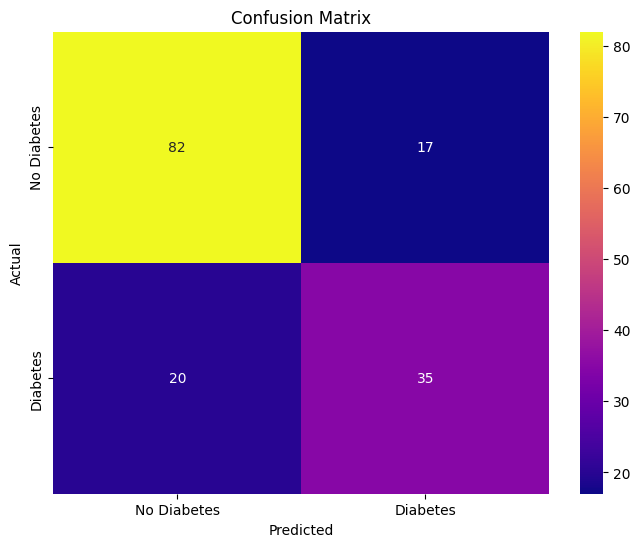

In [30]:
# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="plasma",
xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

In [11]:
new_data1 = pd.DataFrame({
    'Pregnancies': [0],
    'Glucose': [150],
    'BloodPressure': [0],
    'SkinThickness': [0],
    'Insulin': [0],
    'BMI': [30],
    'DiabetesPedigreeFunction': [0],
    'Age': [45]
})

In [12]:
predicted_outcome1 = log_model.predict(new_data1)

print("Predicted Diabetes Outcome1 for condition1:", "Diabetes" if predicted_outcome1 == 1 else "No Diabetes")

Predicted Diabetes Outcome1 for condition1: Diabetes


In [13]:
new_data2 = pd.DataFrame({
    'Pregnancies': [0],
    'Glucose': [0],
    'BloodPressure': [80],
    'SkinThickness': [0],
    'Insulin': [0],
    'BMI': [0],
    'DiabetesPedigreeFunction': [1.2],
    'Age': [60]
})

In [14]:
predicted_outcome2 = log_model.predict(new_data2)

print("Predicted Diabetes Outcome2 for condition2:", "Diabetes" if predicted_outcome2 == 1 else "No Diabetes")

Predicted Diabetes Outcome2 for condition2: No Diabetes


In [15]:
new_data3= pd.DataFrame({
    'Pregnancies': [3],
    'Glucose': [120],
    'BloodPressure': [0],
    'SkinThickness': [20],
    'Insulin': [0],
    
    'BMI': [0],
    'DiabetesPedigreeFunction': [0],
    'Age': [0]
})

In [16]:
predicted_outcome3 = log_model.predict(new_data3)

print("Predicted Diabetes Outcome3 for condition3:", "Diabetes" if predicted_outcome3 == 1 else "No Diabetes")

Predicted Diabetes Outcome3 for condition3: No Diabetes


In [17]:
new_data4 = pd.DataFrame({
    'Pregnancies': [0],
    'Glucose': [0],
    'BloodPressure': [0],
    'SkinThickness': [0],
    'Insulin': [200],
    'BMI': [35],
    'DiabetesPedigreeFunction': [0],
    'Age': [50]
})

In [18]:
predicted_outcome4 = log_model.predict(new_data4)

print("Predicted Diabetes Outcome4 for condition4:", "Diabetes" if predicted_outcome4 == 1 else "No Diabetes")

Predicted Diabetes Outcome4 for condition4: No Diabetes


In [19]:
new_data5 = pd.DataFrame({
    'Pregnancies': [0],
    'Glucose': [100],
    'BloodPressure': [70],
    'SkinThickness': [0],
    'Insulin': [0],
    'BMI': [0],
    'DiabetesPedigreeFunction': [0.5],
    'Age': [0]
})

In [20]:
predicted_outcome5 = log_model.predict(new_data5)

print("Predicted Diabetes Outcome5 for condition5:", "Diabetes" if predicted_outcome5 == 1 else "No Diabetes")

Predicted Diabetes Outcome5 for condition5: No Diabetes


Logistic Regression with L2 Regularization

In [ ]:
model = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')  # Use 'liblinear' for small datasets
model.fit(X_train, y_train)

Accuracy of Logistic Regression with L2 Regularization: 0.78


In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Logistic Regression with L2 Regularization: {accuracy:.2f}")

XGBoost

In [32]:
import xgboost as xgb
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder = False, eval_metric = 'logloss')
xgb_model.fit(X_train, y_train)


c:\Users\srira\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:12:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [33]:
xgb_pred = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)
print(f"Accuracy of XGBoost Model: {xgb_accuracy:.2f}")

Accuracy of XGBoost Model: 0.72



Confusion Matrix for XGBoost:
[[75 24]
 [19 36]]

Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.80      0.76      0.78        99
           1       0.60      0.65      0.63        55

    accuracy                           0.72       154
   macro avg       0.70      0.71      0.70       154
weighted avg       0.73      0.72      0.72       154



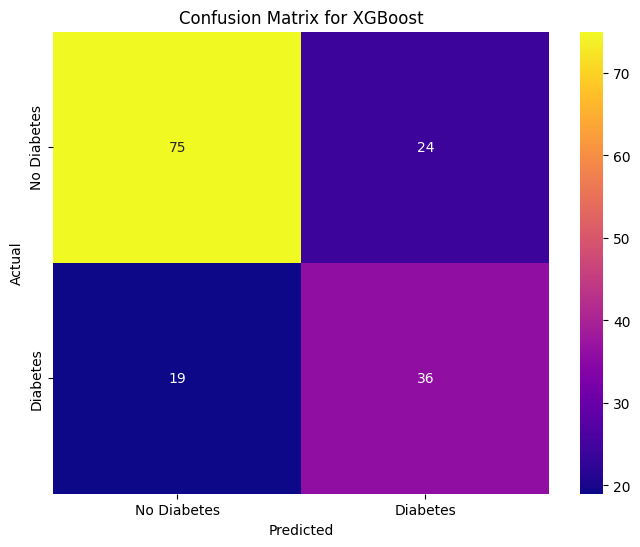

In [34]:
conf_matrix_xgb = confusion_matrix(y_test, xgb_pred)
report_xgb = classification_report(y_test, xgb_pred)
print("\nConfusion Matrix for XGBoost:")
print(conf_matrix_xgb)
print("\nClassification Report for XGBoost:")
print(report_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt="d", cmap="plasma",
xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for XGBoost")
plt.show()